In [4]:
print('Bismillah Hirrahman Nirrahim')

Bismillah Hirrahman Nirrahim


In [5]:
import cv2
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from skimage.feature import hog, local_binary_pattern
from skimage.filters import gabor

(5245193,)
(5245193,)


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


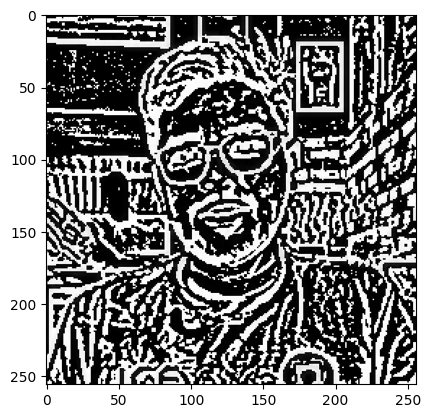

In [24]:
import matplotlib.pyplot as plt
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (256, 256))

    # Apply DoG filtering
    gaussian1 = cv2.GaussianBlur(image, (5, 5), 0)
    gaussian2 = cv2.GaussianBlur(image, (9, 9), 0)
    dog = gaussian1 - gaussian2
    return dog

def extract_features(image):
    # Gabor features
    gabor_features = []
    for theta in range(8):
        theta = theta / 8. * np.pi
        for sigma in (1, 3, 5, 7, 9):
            freq = 0.6 / sigma
            gabor_filter_real, gabor_filter_imag = gabor(image, frequency=freq, theta=theta)
            gabor_features.append(gabor_filter_real)
            gabor_features.append(gabor_filter_imag)
    gabor_features = np.array(gabor_features).flatten()

    # LBP features
    lbp = local_binary_pattern(image, P=8, R=1, method="uniform")
    lbp_hist, _ = np.histogram(lbp, bins=np.arange(0, 10), range=(0, 9))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)

    # HOG features
    hog_features = hog(image, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False)

    # Concatenate all features
    features = np.hstack([gabor_features, lbp_hist, hog_features])
    return features

image1 = preprocess_image('p11.jpeg')
image2 = preprocess_image('p12.jpeg')
plt.imshow(image2, cmap='gray')
# plt.imshow(image2, cmap='gray')

features = extract_features(image1)
print(features.shape)
features = extract_features(image2)
print(features.shape)

